## Pollution Prediction: Machine Learning Techniques

### Competition Description

Monitoring and preserving air quality has become
one of the most essential activities in many industrial and urban
areas today. The quality of air is adversely affected due to
various forms of pollution caused by transportation, electricity,
fuel uses etc.

The deposition of harmful gases is creating a
serious threat for the quality of life in smart cities. With
increasing air pollution, we need to implement efficient air
quality monitoring models which collect information about the
concentration of air pollutants and provide assessment of air
pollution in each area.

The aim of our model is to investigate various big-data and
machine learning based techniques for air quality forecasting.

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read the datasets

In [2]:
df_city_day=pd.read_csv("city_day.csv")
#this is same dataset because we are using two imputer
df_city=pd.read_csv("city_day.csv")

## Exploratory Data Analysis

In [3]:
df_city_day.head(20)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
5,Ahmedabad,2015-01-06,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN,NaN
6,Ahmedabad,2015-01-07,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN,NaN
7,Ahmedabad,2015-01-08,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN,NaN
8,Ahmedabad,2015-01-09,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN,NaN
9,Ahmedabad,2015-01-10,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,NaN,NaN


In [4]:
df_city_day.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [5]:
df_city_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


## Initial Takeways

:- The AQI_bucket is our outcome or dependent variable. it contains categorical value which tells the quality of air.

:- PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene are discrete quantitative datatypes variables which helps in predicting the Air Quality Index.

:- The Date variable have no impact on the outcome variable. Thus they should be dropped.

:- The City varible can be used for visualizing Air Quality Index for a particular city. 


## Checking Null Values

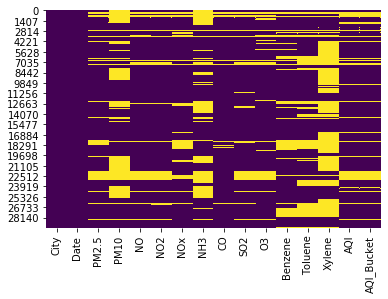

In [6]:
sns.heatmap(df_city_day.isnull(),cbar=False,cmap='viridis')

In [7]:
df_city_day.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

## Data Cleaning 

In [8]:
#this is for replacing null values of AQI_Bucket
def impute_aqi_bucket(cols):
    Aqi=cols[0]
    Aqi_bucket=cols[1]
    if pd.isnull(Aqi_bucket):
        
        if (Aqi>=0 and Aqi <50):
            return "Good"
        elif (Aqi>=50 and Aqi <100):
            return "Satisfactory"
        elif (Aqi>=100 and Aqi <200):
            return "Moderate"
        elif (Aqi>=200 and Aqi <300):
            return "Poor"
        elif (Aqi>=300 and Aqi <400):
            return "Very Poor"
        else:
            return "Severe"
    else:
        return Aqi_bucket

In [9]:
#with the help of Nearest neighbors imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=8, weights="uniform")
df_city_day[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI']]=imputer.fit_transform(df_city_day.drop(['City','Date','AQI_Bucket'],axis=1))
df_city_day['AQI_Bucket']=df_city_day[['AQI','AQI_Bucket']].apply(impute_aqi_bucket,axis=1)

In [10]:
#with the help of enable_iterative_imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=35, random_state=0)
imp.fit(df_city.drop(['City','Date','AQI_Bucket'],axis=1))
df_city[['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI']]=imp.transform(df_city.drop(['City','Date','AQI_Bucket'],axis=1))
df_city['AQI_Bucket']=df_city[['AQI','AQI_Bucket']].apply(impute_aqi_bucket,axis=1)

E:\Anaconda\lib\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


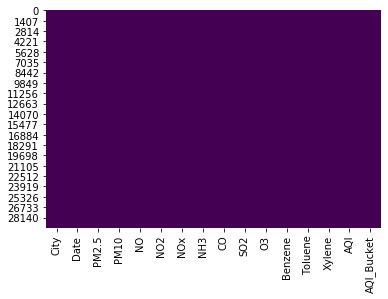

In [11]:
sns.heatmap(df_city.isnull(),cbar=False,cmap='viridis')

## Feature Engineering

In [12]:
print(df_city_day['City'].value_counts())

Delhi                 2009
Mumbai                2009
Bengaluru             2009
Lucknow               2009
Chennai               2009
Ahmedabad             2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Ernakulam              162
Kochi                  162
Aizawl                 113
Name: City, dtype: int64


In [13]:
#this is for finding AQI_Bucket with the help of AQI
def impute_aqi_bucket(cols):
    Aqi=cols
    if (Aqi>=0 and Aqi <50):
        return "Good"
    elif (Aqi>=50 and Aqi <100):
            return "Satisfactory"
    elif (Aqi>=100 and Aqi <200):
        return "Moderate"
    elif (Aqi>=200 and Aqi <300):
        return "Poor"
    elif (Aqi>=300 and Aqi <400):
        return "Very Poor"
    else:
        return "Severe"
temp=df_city_day[['City', 'AQI']].groupby(['City'], as_index=False).mean()
temp['AQI_Bucket']=temp['AQI'].apply(impute_aqi_bucket)
temp

,City,AQI,AQI_Bucket
0,Ahmedabad,354.785521,Very Poor
1,Aizawl,35.315265,Good
2,Amaravati,99.648037,Satisfactory
3,Amritsar,120.676641,Moderate
4,Bengaluru,96.612973,Satisfactory
5,Bhopal,133.937015,Moderate
6,Brajrajnagar,149.989517,Moderate
7,Chandigarh,96.734375,Satisfactory
8,Chennai,117.518117,Moderate
9,Coimbatore,76.524423,Satisfactory


In [14]:
temp1=df_city[['City', 'AQI']].groupby(['City'], as_index=False).mean()
temp1['AQI_Bucket']=temp1['AQI'].apply(impute_aqi_bucket)
temp1

,City,AQI,AQI_Bucket
0,Ahmedabad,362.900003,Very Poor
1,Aizawl,34.844147,Good
2,Amaravati,99.722783,Satisfactory
3,Amritsar,121.793475,Moderate
4,Bengaluru,96.606648,Satisfactory
5,Bhopal,133.530681,Moderate
6,Brajrajnagar,151.335253,Moderate
7,Chandigarh,96.020150,Satisfactory
8,Chennai,117.064782,Moderate
9,Coimbatore,72.701744,Satisfactory


## Converting categorical to ordinal

In [15]:
df_city_day['AQI_Bucket'].unique()

array(['Moderate', 'Very Poor', 'Severe', 'Satisfactory', 'Poor', 'Good'],
      dtype=object)

In [16]:
#for df_city_day
#Converting city column 
mapping={}
for i in range(len(temp['City'])):
    mapping.update({temp['City'].loc(0)[i]:i})
df_city_day['City'] = df_city_day['City'].map(mapping).astype(int)
#Converting AQI_Bucket column
mapping={"Good":5,"Satisfactory":4,"Moderate":3,"Poor":2,"Very Poor":1,"Severe":0}
df_city_day['AQI_Bucket']=df_city_day['AQI_Bucket'].map(mapping).astype(int)
df_city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,0,2015-01-01,21.65750,93.16375,0.92,18.22,17.15,10.37375,0.92,27.64,133.36,0.00,0.02,0.00,105.625,3
1,0,2015-01-02,31.07500,116.25000,0.97,15.69,16.46,10.68375,0.97,24.55,34.06,3.68,5.50,3.77,110.875,3
2,0,2015-01-03,106.91625,159.50375,17.40,19.30,29.70,8.66625,17.40,29.07,30.70,6.80,16.40,2.25,313.000,1
3,0,2015-01-04,38.96750,122.13625,1.70,18.48,17.97,11.93500,1.70,18.59,36.08,4.43,10.14,1.00,125.625,3
4,0,2015-01-05,130.23125,184.95625,22.10,21.42,37.76,9.12750,22.10,39.33,39.31,7.01,18.89,2.78,354.375,1


In [17]:
#for df_city
#Converting city column 
mapping={}
for i in range(len(temp['City'])):
    mapping.update({temp['City'].loc(0)[i]:i})
df_city['City'] = df_city['City'].map(mapping).astype(int)
df_city.head()
#Converting AQI_Bucket column
mapping={"Good":5,"Satisfactory":4,"Moderate":3,"Poor":2,"Very Poor":1,"Severe":0}
df_city['AQI_Bucket']=df_city['AQI_Bucket'].map(mapping).astype(float)
df_city.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,0,2015-01-01,76.333533,154.174268,0.92,18.22,17.15,18.413257,0.92,27.64,133.36,0.00,0.02,0.00,197.841667,3.0
1,0,2015-01-02,46.195008,102.619047,0.97,15.69,16.46,12.837205,0.97,24.55,34.06,3.68,5.50,3.77,126.058811,3.0
2,0,2015-01-03,51.221777,83.490644,17.40,19.30,29.70,68.776068,17.40,29.07,30.70,6.80,16.40,2.25,319.319844,1.0
3,0,2015-01-04,46.475874,98.555089,1.70,18.48,17.97,25.812266,1.70,18.59,36.08,4.43,10.14,1.00,132.780022,3.0
4,0,2015-01-05,57.234701,91.672032,22.10,21.42,37.76,79.499953,22.10,39.33,39.31,7.01,18.89,2.78,391.343600,1.0


In [18]:
#Dropping date column
df_city_day.drop(['Date'],axis=1,inplace=True)
df_city.drop(['Date'],axis=1,inplace=True)

## Checking Pearson Correlation

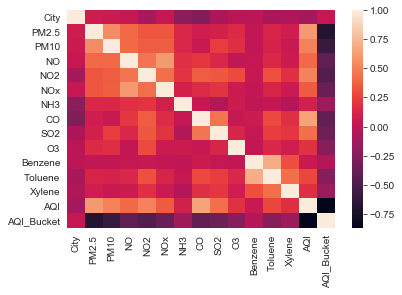

In [19]:
sns.set_style("whitegrid")
sns.heatmap(df_city_day.corr(), vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None)

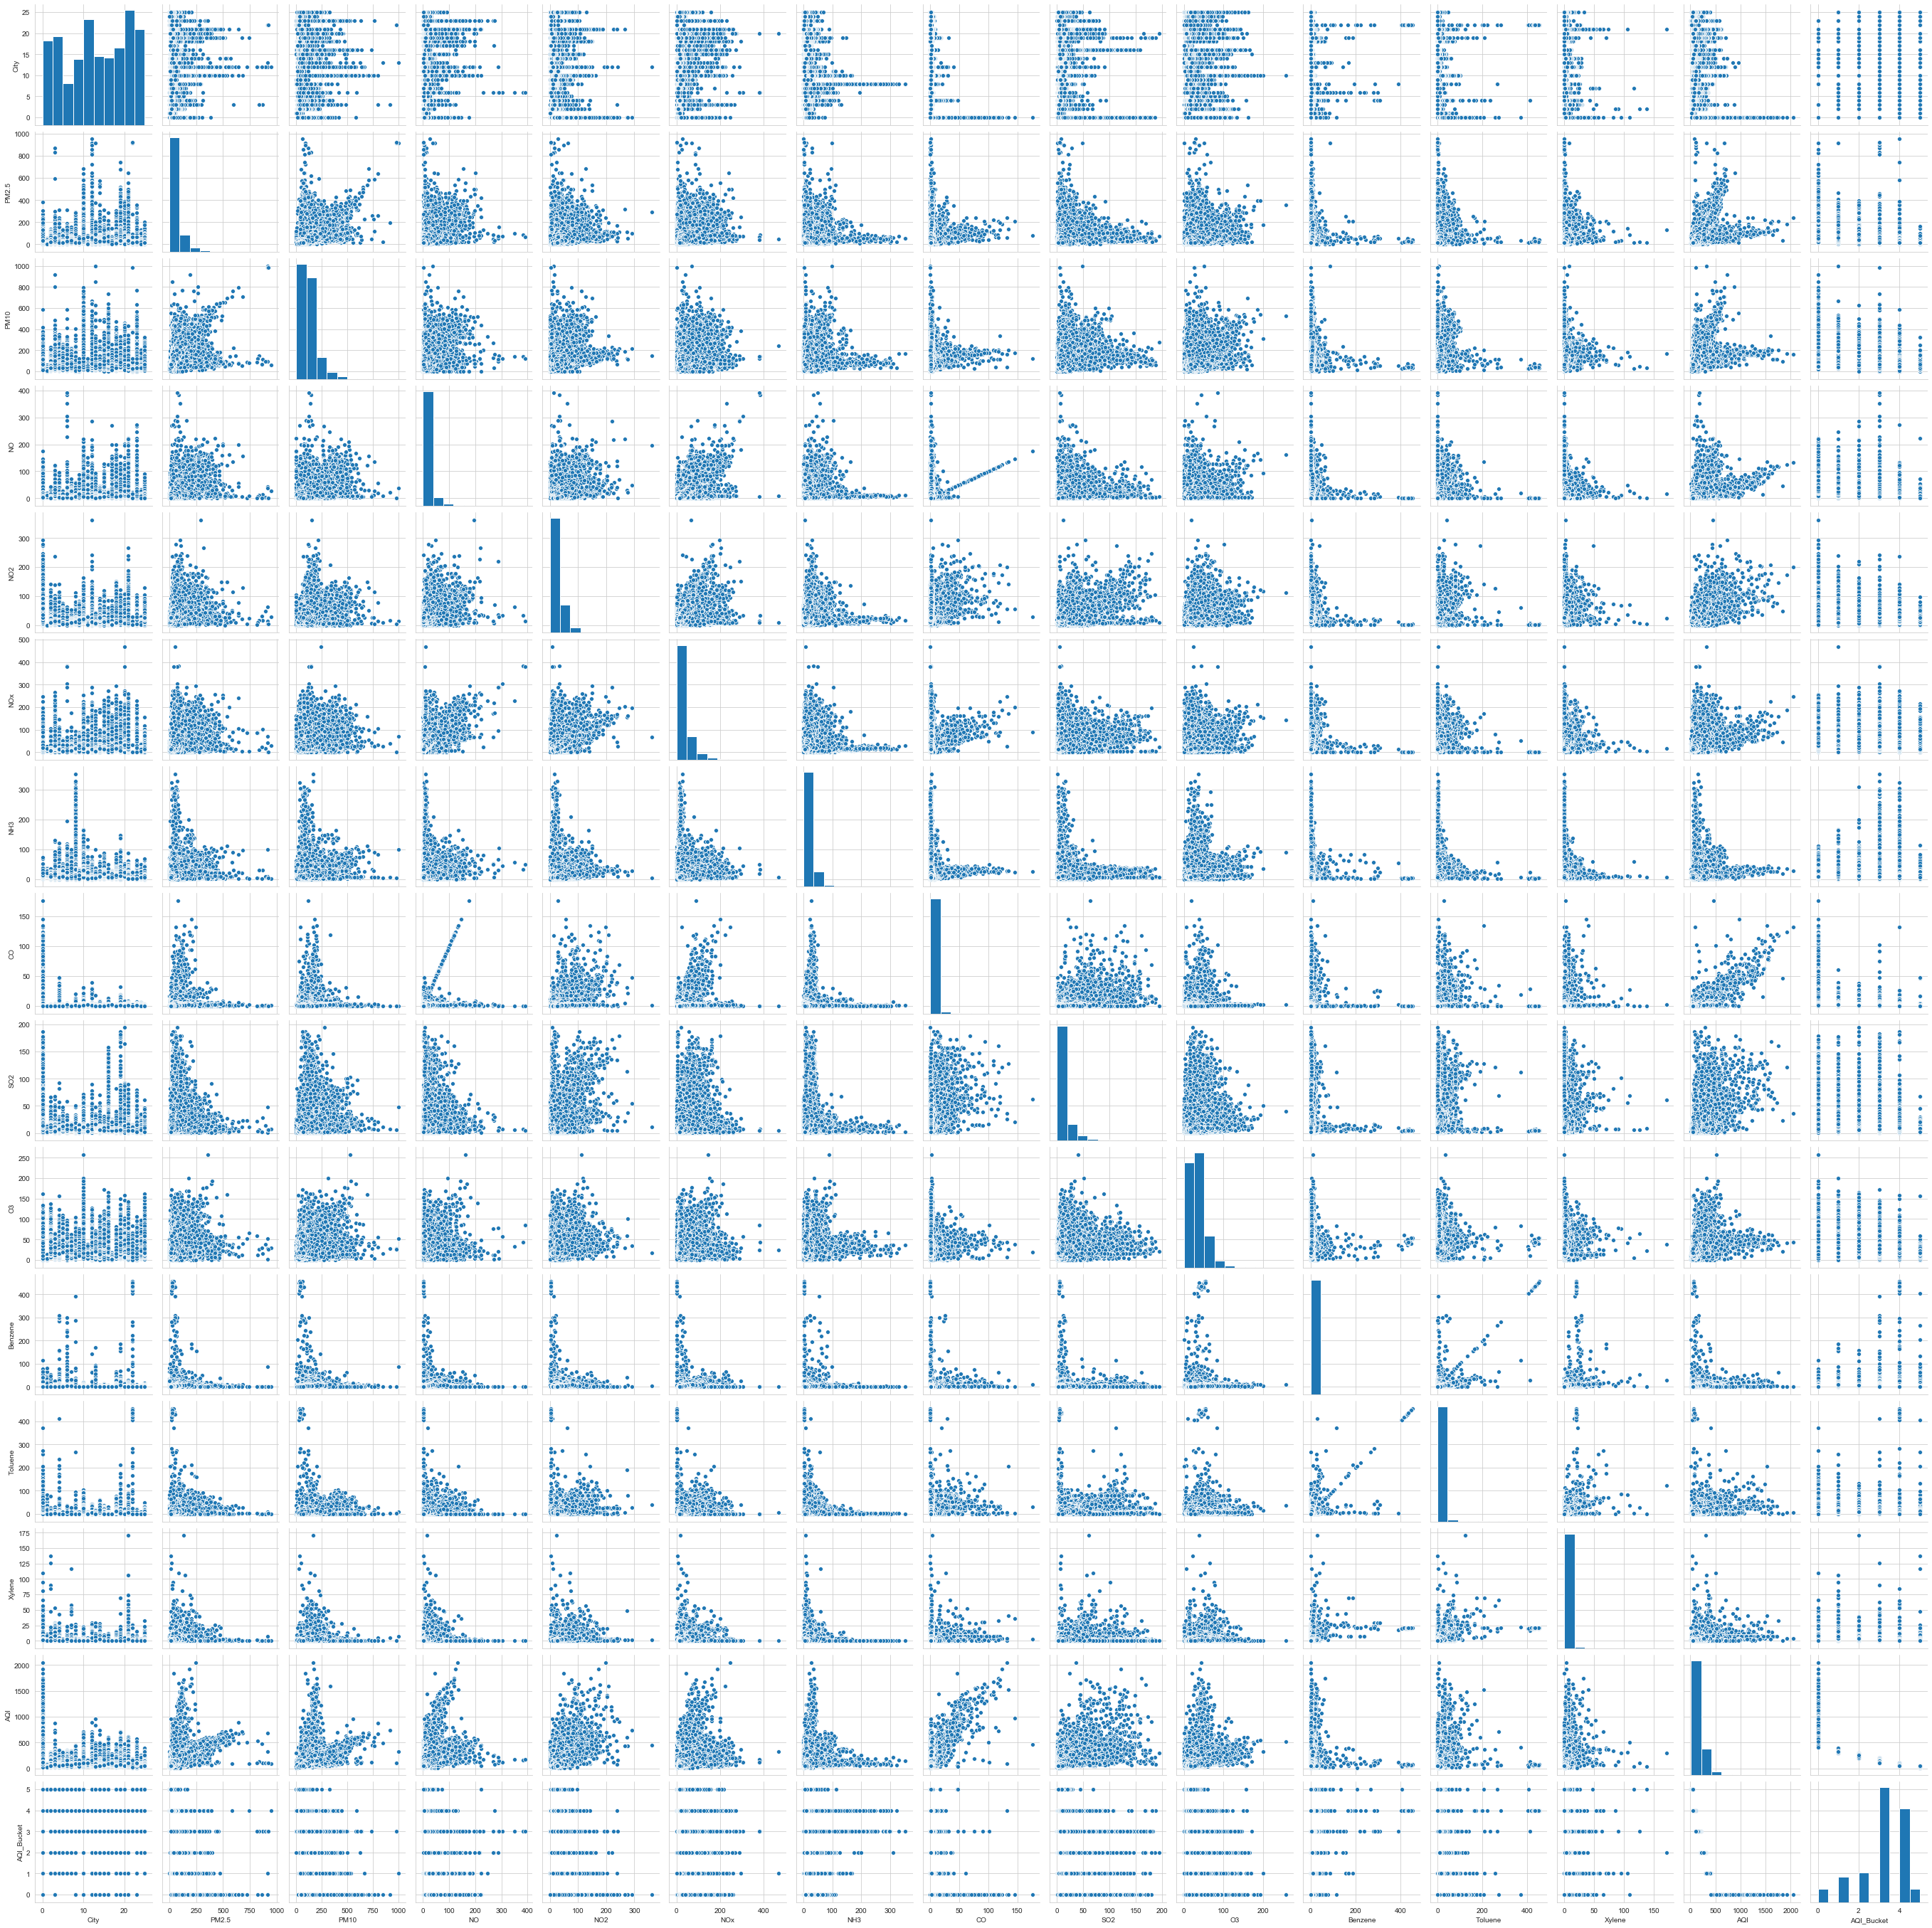

In [20]:
sns.pairplot(df_city_day, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)

## Standardization/Normalization

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#df_city_day
scaler.fit(df_city_day.drop(['City','AQI','AQI_Bucket'],axis=1))
scaled_features=scaler.transform(df_city_day.drop(['City','AQI','AQI_Bucket'],axis=1))
df_features1=pd.DataFrame(scaled_features)
#df_city
scaler.fit(df_city.drop(['City','AQI','AQI_Bucket'],axis=1))
scaled_features=scaler.transform(df_city.drop(['City','AQI','AQI_Bucket'],axis=1))
df_feature2s=pd.DataFrame(scaled_features)

## Lets check accuracy from splitting Train Data

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df_city_day['AQI_Bucket'], test_size = 0.3, random_state = 101)

In [23]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_city.drop(['AQI','AQI_Bucket'],axis=1), df_city['AQI_Bucket'], test_size = 0.3, random_state = 101)

## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
#for dataset cleaned by Nearest neighbors imputer
logmodel=LogisticRegression(random_state=101)
logmodel.fit(X_train,y_train)
logmodel.score(X_test, y_test)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.725507900677201

In [25]:
#Errors:-
#for dataset cleaned by Nearest neighbors imputer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Confusion matrix==>\n",confusion_matrix(y_test,logmodel.predict(X_test)))
print("\n\n")
print("Classification report==>\n",classification_report(y_test,logmodel.predict(X_test)))

Confusion matrix==>
 [[ 309   90    7    2    0    0]
 [  27  574  116   53   52    0]
 [   4  129  280  525   16    0]
 [   8   24   49 2890  458    9]
 [   2    6    5  539 2239   63]
 [   0    0    0    5  243  136]]



Classification report==>
               precision    recall  f1-score   support

           0       0.88      0.76      0.82       408
           1       0.70      0.70      0.70       822
           2       0.61      0.29      0.40       954
           3       0.72      0.84      0.78      3438
           4       0.74      0.78      0.76      2854
           5       0.65      0.35      0.46       384

    accuracy                           0.73      8860
   macro avg       0.72      0.62      0.65      8860
weighted avg       0.72      0.73      0.71      8860



In [26]:
#for dataset cleaned by enable_iterative_imputer
logmodel=LogisticRegression(random_state=101)
logmodel.fit(X_train1,y_train1)
logmodel.score(X_test1, y_test1)

E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.5923250564334086

In [27]:
#Errors:-
#for dataset cleaned by enable_iterative_imputer
print("Confusion matrix==>\n",confusion_matrix(y_test,logmodel.predict(X_test1)))
print("\n\n")
print("Classification report==>\n",classification_report(y_test,logmodel.predict(X_test1)))

Confusion matrix==>
 [[ 247  116   18   23    3    1]
 [  90  414   65  202   51    0]
 [  60  168   71  635   20    0]
 [  36  259   31 2654  449    9]
 [   6   22   10 1319 1442   55]
 [   0    1    0   54  277   52]]



Classification report==>
               precision    recall  f1-score   support

           0       0.56      0.61      0.58       408
           1       0.42      0.50      0.46       822
           2       0.36      0.07      0.12       954
           3       0.54      0.77      0.64      3438
           4       0.64      0.51      0.57      2854
           5       0.44      0.14      0.21       384

    accuracy                           0.55      8860
   macro avg       0.50      0.43      0.43      8860
weighted avg       0.54      0.55      0.52      8860



## Support Vector Machines

In [28]:
from sklearn.svm import SVC
#for dataset cleaned by Nearest neighbors imputer
model=SVC()
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.7752821670428894

In [29]:
#Errors:-
#for dataset cleaned by Nearest neighbors imputer
print("Confusion matrix==>\n",confusion_matrix(y_test,model.predict(X_test)))
print("\n\n")
print("Classification report==>\n",classification_report(y_test,model.predict(X_test)))

Confusion matrix==>
 [[ 335   65    7    1    0    0]
 [  37  633  121   12   19    0]
 [   6   80  564  266   38    0]
 [  10   13  122 2803  482    8]
 [   3    5    9  412 2399   26]
 [   0    0    0    7  242  135]]



Classification report==>
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       408
           1       0.80      0.77      0.78       822
           2       0.69      0.59      0.63       954
           3       0.80      0.82      0.81      3438
           4       0.75      0.84      0.80      2854
           5       0.80      0.35      0.49       384

    accuracy                           0.78      8860
   macro avg       0.78      0.70      0.72      8860
weighted avg       0.78      0.78      0.77      8860



In [30]:
#for dataset cleaned by enable_iterative_imputer
model=SVC()
model.fit(X_train1,y_train1)
model.score(X_test1, y_test1)

0.7881489841986457

In [31]:
#Errors:-
#for dataset cleaned by enable_iterative_imputer
print("Confusion matrix==>\n",confusion_matrix(y_test,model.predict(X_test1)))
print("\n\n")
print("Classification report==>\n",classification_report(y_test,model.predict(X_test1)))

Confusion matrix==>
 [[ 325   76    5    2    0    0]
 [  36  557  140   36   52    1]
 [   6  102  492  340   14    0]
 [  17   17  132 2744  511   17]
 [   4    5   10  542 2216   77]
 [   0    0    0    5  247  132]]



Classification report==>
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       408
           1       0.74      0.68      0.71       822
           2       0.63      0.52      0.57       954
           3       0.75      0.80      0.77      3438
           4       0.73      0.78      0.75      2854
           5       0.58      0.34      0.43       384

    accuracy                           0.73      8860
   macro avg       0.71      0.65      0.67      8860
weighted avg       0.73      0.73      0.72      8860



## K Means Clustering

##### for dataset cleaned by Nearest neighbors imputer

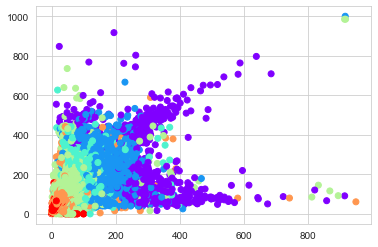

In [32]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=7)
kmeans.fit(X_train)
plt.scatter(df_city_day['PM2.5'][:],df_city_day['PM10'][:],c=df_city_day['AQI_Bucket'],cmap='rainbow')

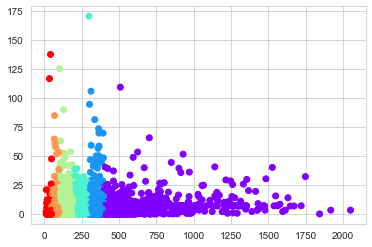

In [33]:
plt.scatter(df_city_day['AQI'][:],df_city_day['Xylene'][:],c=df_city_day['AQI_Bucket'],cmap='rainbow')

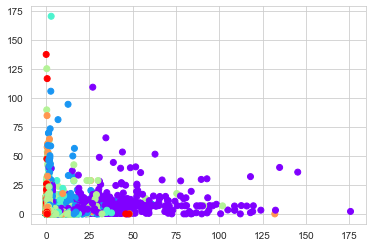

In [34]:
plt.scatter(df_city_day['CO'][:],df_city_day['Xylene'][:],c=df_city_day['AQI_Bucket'],cmap='rainbow')

##### for dataset cleaned by enable_iterative_imputer

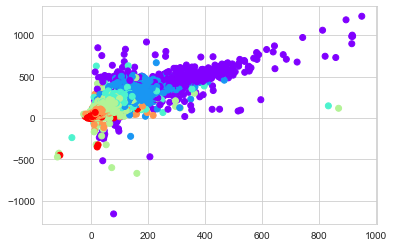

In [35]:
kmeans=KMeans(n_clusters=7)
kmeans.fit(X_train1)
plt.scatter(df_city['PM2.5'][:],df_city['PM10'][:],c=df_city['AQI_Bucket'],cmap='rainbow')

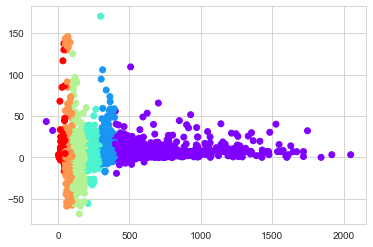

In [36]:
plt.scatter(df_city['AQI'][:],df_city['Xylene'][:],c=df_city['AQI_Bucket'],cmap='rainbow')

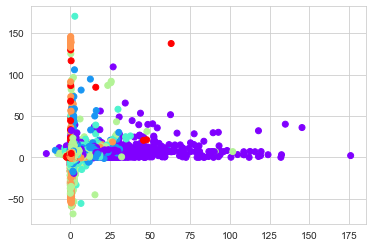

In [37]:
plt.scatter(df_city['CO'][:],df_city['Xylene'][:],c=df_city['AQI_Bucket'],cmap='rainbow')

## K-Nearest Neighbors

##### for dataset cleaned by Nearest neighbors imputer

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn.score(X_test, y_test)

0.7659142212189616

##### checking different neighbours

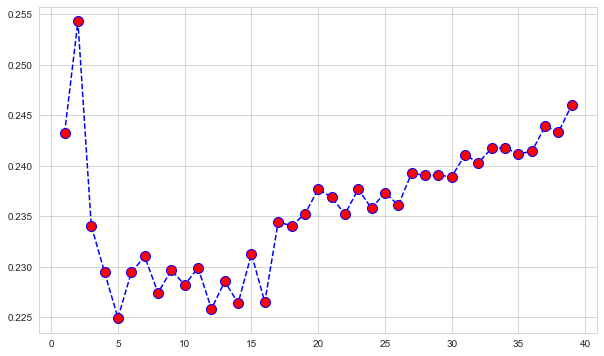

In [39]:
error_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))
    
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',
         markerfacecolor='red',markersize=10)

In [40]:
#taking 3 as value of k as it has low error
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
knn.score(X_test, y_test)

0.768961625282167

In [41]:
#Errors:-
#for dataset cleaned by Nearest neighbors imputer
print("Confusion matrix==>\n",confusion_matrix(y_test,knn.predict(X_test)))
print("\n\n")
print("Classification report==>\n",classification_report(y_test,knn.predict(X_test)))

Confusion matrix==>
 [[ 328   72    7    1    0    0]
 [  57  590  144   27    4    0]
 [   6  113  510  311   14    0]
 [  11   21  142 2836  421    7]
 [   3   10   16  398 2325  102]
 [   0    0    0    6  154  224]]



Classification report==>
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       408
           1       0.73      0.72      0.72       822
           2       0.62      0.53      0.58       954
           3       0.79      0.82      0.81      3438
           4       0.80      0.81      0.81      2854
           5       0.67      0.58      0.62       384

    accuracy                           0.77      8860
   macro avg       0.74      0.71      0.72      8860
weighted avg       0.77      0.77      0.77      8860



#####  for dataset cleaned by enable_iterative_imputer

In [42]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train1,y_train1)
knn.score(X_test1, y_test1)

0.8084650112866817

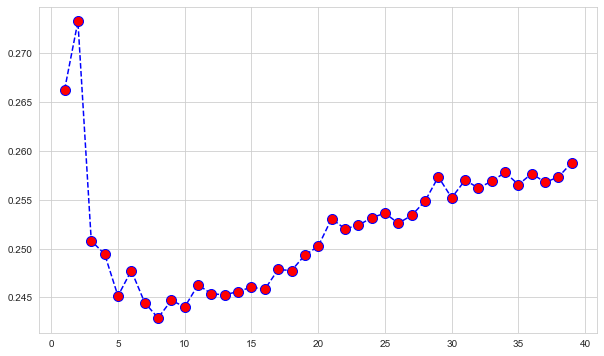

In [43]:
error_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train1,y_train1)
    pred_i=knn.predict(X_test1)
    error_rate.append(np.mean(pred_i!=y_test))
    
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',
         markerfacecolor='red',markersize=10)

In [44]:
#taking 3 as value of k as it has low error
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train1,y_train1)
knn.score(X_test1, y_test1)

0.8136568848758465

In [45]:
#Errors:-
#for dataset cleaned by enable_iterative_imputer
print("Confusion matrix==>\n",confusion_matrix(y_test,knn.predict(X_test1)))
print("\n\n")
print("Classification report==>\n",classification_report(y_test,knn.predict(X_test1)))

Confusion matrix==>
 [[ 341   56    9    2    0    0]
 [  50  568  118   32   54    0]
 [   8  100  576  253   15    2]
 [  13   20  164 2845  379   17]
 [   4    4   15  578 2140  113]
 [   0    1    1    6  152  224]]



Classification report==>
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       408
           1       0.76      0.69      0.72       822
           2       0.65      0.60      0.63       954
           3       0.77      0.83      0.80      3438
           4       0.78      0.75      0.77      2854
           5       0.63      0.58      0.61       384

    accuracy                           0.76      8860
   macro avg       0.73      0.72      0.72      8860
weighted avg       0.75      0.76      0.75      8860



## Naive Bayes Classifier

In [46]:
from sklearn.naive_bayes import GaussianNB
#for dataset cleaned by Nearest neighbors imputer
model = GaussianNB()
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.5961625282167042

In [47]:
#Errors:-
#for dataset cleaned by Nearest neighbors imputer
print("Confusion matrix==>\n",confusion_matrix(y_test,model.predict(X_test)))
print("\n\n")
print("Classification report==>\n",classification_report(y_test,model.predict(X_test)))

Confusion matrix==>
 [[ 269  134    3    2    0    0]
 [  64  443  220   37   58    0]
 [  22   96  387  406   41    2]
 [  67   67  184 2264  765   91]
 [  13   11   15  563 1596  656]
 [   2    0    0    8   51  323]]



Classification report==>
               precision    recall  f1-score   support

           0       0.62      0.66      0.64       408
           1       0.59      0.54      0.56       822
           2       0.48      0.41      0.44       954
           3       0.69      0.66      0.67      3438
           4       0.64      0.56      0.59      2854
           5       0.30      0.84      0.44       384

    accuracy                           0.60      8860
   macro avg       0.55      0.61      0.56      8860
weighted avg       0.62      0.60      0.60      8860



In [48]:
#for dataset cleaned by enable_iterative_imputer
model = GaussianNB()
model.fit(X_train1,y_train1)
model.score(X_test1, y_test1)

0.713431151241535

In [49]:
#Errors:-
#for dataset cleaned by enable_iterative_imputer
print("Confusion matrix==>\n",confusion_matrix(y_test,model.predict(X_test1)))
print("\n\n")
print("Classification report==>\n",classification_report(y_test,model.predict(X_test1)))

Confusion matrix==>
 [[ 266  135    7    0    0    0]
 [  72  431  236   30   53    0]
 [  26   87  486  333   16    6]
 [  69   44  240 2571  434   80]
 [  15    8   27  657 1813  334]
 [   2    0    0    6  104  272]]



Classification report==>
               precision    recall  f1-score   support

           0       0.59      0.65      0.62       408
           1       0.61      0.52      0.56       822
           2       0.49      0.51      0.50       954
           3       0.71      0.75      0.73      3438
           4       0.75      0.64      0.69      2854
           5       0.39      0.71      0.51       384

    accuracy                           0.66      8860
   macro avg       0.59      0.63      0.60      8860
weighted avg       0.67      0.66      0.66      8860



## Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier
#for dataset cleaned by Nearest neighbors imputer
dtclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtclassifier.fit(X_train, y_train)
dtclassifier.score(X_test, y_test)

0.7523702031602709

In [51]:
#Errors:-
#for dataset cleaned by Nearest neighbors imputer
print("Confusion matrix==>\n",confusion_matrix(y_test,dtclassifier.predict(X_test)))
print("\n\n")
print("Classification report==>\n",classification_report(y_test,dtclassifier.predict(X_test)))

Confusion matrix==>
 [[ 326   62    6   11    3    0]
 [  51  600  123   38   10    0]
 [   8  135  552  239   20    0]
 [  10   39  215 2714  447   13]
 [   3    9   24  446 2225  147]
 [   0    0    2   15  118  249]]



Classification report==>
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       408
           1       0.71      0.73      0.72       822
           2       0.60      0.58      0.59       954
           3       0.78      0.79      0.79      3438
           4       0.79      0.78      0.78      2854
           5       0.61      0.65      0.63       384

    accuracy                           0.75      8860
   macro avg       0.72      0.72      0.72      8860
weighted avg       0.75      0.75      0.75      8860



In [52]:
#for dataset cleaned by enable_iterative_imputer
dtclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtclassifier.fit(X_train1, y_train1)
dtclassifier.score(X_test1, y_test1)

0.7988713318284424

In [53]:
#Errors:-
#for dataset cleaned by enable_iterative_imputer
print("Confusion matrix==>\n",confusion_matrix(y_test,dtclassifier.predict(X_test1)))
print("\n\n")
print("Classification report==>\n",classification_report(y_test,dtclassifier.predict(X_test1)))

Confusion matrix==>
 [[ 333   64   10    1    0    0]
 [  71  538  126   35   52    0]
 [  14  118  575  236   11    0]
 [  12   28  210 2775  399   14]
 [   3    6   17  603 2076  149]
 [   0    0    1    7  117  259]]



Classification report==>
               precision    recall  f1-score   support

           0       0.77      0.82      0.79       408
           1       0.71      0.65      0.68       822
           2       0.61      0.60      0.61       954
           3       0.76      0.81      0.78      3438
           4       0.78      0.73      0.75      2854
           5       0.61      0.67      0.64       384

    accuracy                           0.74      8860
   macro avg       0.71      0.71      0.71      8860
weighted avg       0.74      0.74      0.74      8860



## Grid Search

In [89]:
from sklearn.model_selection import GridSearchCV
#for dataset cleaned by Nearest neighbors imputer
param_grid={'C':[0.01,0.1,1,10,100,1000,10000],'gamma':[1,0.1,0.01,0.001,.0001,.00001]}
grid=GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(X_train,y_train)
grid.score(X_test, y_test)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] C=0.01, gamma=1 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... C=0.01, gamma=1, score=0.418, total=  55.6s
[CV] C=0.01, gamma=1 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   55.5s remaining:    0.0s


[CV] ..................... C=0.01, gamma=1, score=0.418, total=  56.1s
[CV] C=0.01, gamma=1 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.9min remaining:    0.0s


[CV] ..................... C=0.01, gamma=1, score=0.422, total=  54.7s
[CV] C=0.01, gamma=1 .................................................
[CV] ..................... C=0.01, gamma=1, score=0.418, total=  54.8s
[CV] C=0.01, gamma=1 .................................................
[CV] ..................... C=0.01, gamma=1, score=0.418, total=  55.8s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................... C=0.01, gamma=0.1, score=0.418, total=  41.7s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................... C=0.01, gamma=0.1, score=0.418, total=  41.6s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................... C=0.01, gamma=0.1, score=0.422, total=  41.5s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................... C=0.01, gamma=0.1, score=0.418, total=  41.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] .

[CV] ........................ C=1, gamma=1, score=0.430, total= 1.2min
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.430, total= 1.2min
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.427, total= 1.2min
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.433, total= 1.1min
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.431, total= 1.2min
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.461, total=  59.1s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.464, total=  57.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] .

[CV] ................... C=10, gamma=1e-05, score=0.792, total=  10.6s
[CV] C=10, gamma=1e-05 ...............................................
[CV] ................... C=10, gamma=1e-05, score=0.797, total=  10.8s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.432, total= 3.6min
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.431, total= 3.6min
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.428, total= 3.5min
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.434, total= 3.6min
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.432, total= 3.2min
[CV] C=100, gamma=0.1 ................................................
[CV] .

[CV] ................. C=1000, gamma=1e-05, score=0.835, total=  10.1s
[CV] C=1000, gamma=1e-05 .............................................
[CV] ................. C=1000, gamma=1e-05, score=0.837, total=  10.5s
[CV] C=1000, gamma=1e-05 .............................................
[CV] ................. C=1000, gamma=1e-05, score=0.840, total=  10.4s
[CV] C=1000, gamma=1e-05 .............................................
[CV] ................. C=1000, gamma=1e-05, score=0.835, total=  10.6s
[CV] C=10000, gamma=1 ................................................
[CV] .................... C=10000, gamma=1, score=0.432, total= 1.9min
[CV] C=10000, gamma=1 ................................................
[CV] .................... C=10000, gamma=1, score=0.431, total= 2.0min
[CV] C=10000, gamma=1 ................................................
[CV] .................... C=10000, gamma=1, score=0.428, total= 1.9min
[CV] C=10000, gamma=1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed: 173.8min finished


0.8471783295711061

In [ ]:
#Errors:-
#for dataset cleaned by Nearest neighbors imputer
print("Confusion matrix==>\n",confusion_matrix(y_test,grid.predict(X_test)))
print("\n\n")
print("Classification report==>\n",classification_report(y_test,grid.predict(X_test)))

In [ ]:
#for dataset cleaned by enable_iterative_imputer
param_grid={'C':[0.01,0.1,1,10,100,1000,10000],'gamma':[1,0.1,0.01,0.001,.0001,.00001]}
grid=GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(X_train1,y_train1)
grid.score(X_test1, y_test1)

In [ ]:
#Errors:-
#for dataset cleaned by enable_iterative_imputer
print("Confusion matrix==>\n",confusion_matrix(y_test,grid.predict(X_test1)))
print("\n\n")
print("Classification report==>\n",classification_report(y_test,grid.predict(X_test1)))

## RandomForestClassifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
#for dataset cleaned by Nearest neighbors imputer
rclassifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
rclassifier.fit(X_train, y_train)
rclassifier.score(X_test, y_test)

0.8244920993227991

In [55]:
#Errors:-
#for dataset cleaned by Nearest neighbors imputer
print("Confusion matrix==>\n",confusion_matrix(y_test,rclassifier.predict(X_test)))
print("\n\n")
print("Classification report==>\n",classification_report(y_test,rclassifier.predict(X_test)))

Confusion matrix==>
 [[ 336   61    7    4    0    0]
 [  33  665   95   24    5    0]
 [   5   91  604  241   13    0]
 [   3   18  123 3008  281    5]
 [   3    8   14  328 2440   61]
 [   0    0    0    8  124  252]]



Classification report==>
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       408
           1       0.79      0.81      0.80       822
           2       0.72      0.63      0.67       954
           3       0.83      0.87      0.85      3438
           4       0.85      0.85      0.85      2854
           5       0.79      0.66      0.72       384

    accuracy                           0.82      8860
   macro avg       0.81      0.78      0.79      8860
weighted avg       0.82      0.82      0.82      8860



In [56]:
#for dataset cleaned by enable_iterative_imputer
rclassifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
rclassifier.fit(X_train1, y_train1)
rclassifier.score(X_test1, y_test1)

0.8556433408577878

In [57]:
#Errors:-
#for dataset cleaned by enable_iterative_imputer
print("Confusion matrix==>\n",confusion_matrix(y_test,rclassifier.predict(X_test1)))
print("\n\n")
print("Classification report==>\n",classification_report(y_test,rclassifier.predict(X_test1)))

Confusion matrix==>
 [[ 339   59    7    3    0    0]
 [  32  612   98   28   52    0]
 [   5   90  612  239    8    0]
 [   6   17  144 2994  265   12]
 [   3    4    8  536 2218   85]
 [   0    0    0    5  124  255]]



Classification report==>
               precision    recall  f1-score   support

           0       0.88      0.83      0.85       408
           1       0.78      0.74      0.76       822
           2       0.70      0.64      0.67       954
           3       0.79      0.87      0.83      3438
           4       0.83      0.78      0.80      2854
           5       0.72      0.66      0.69       384

    accuracy                           0.79      8860
   macro avg       0.79      0.75      0.77      8860
weighted avg       0.79      0.79      0.79      8860



## Accuracies 

## for dataset cleaned by Nearest_neighbors_imputer ==>

### Logistic Regression: 72.55 %

### K-Nearest Neighbors: 81.37 %

### Support Vector Machines: 77.53 %

### Naive Bayes Classifier: 59.62 %

### Decision Tree Classifier: 75.24 %

### Random Forest: 82.45 %

## for dataset cleaned by Enable_iterative_imputer ==> 

### Logistic Regression: 59.23 %

### K-Nearest Neighbors: 81.37 %

### Support Vector Machines: 78.81 %

### Naive Bayes Classifier: 71.34 %

### Decision Tree Classifier: 79.89 %

### Random Forest: 85.56 %

# Random Forest is giving the best accuracy in both cases.

# -------------------------------------------------------------------------------------------------------------